# Algerian Forest Fire EDA and FE

By Avinash Kumar

Life cycle of Data Science 

1. Understanding the problem statement 
2. Data Collection
3. Data Cleaning
4. EDA ( Exploratory data analysis)
5. Feature Engineering
6. Predictive Modeling
7. Data Visualization

### Sample data taken from UCI - MAchine learning Repository

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings 
warnings.filterwarnings("ignore")

reading the dataset

In [3]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [5]:
df.dtypes

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
#drop an row 
df.drop([122,123], inplace = True)
df.reset_index(inplace = True)
df.drop('index', axis=1, inplace = True)

In [9]:
#locating the region based on the index
df.loc[:122, "region"] = 'bejaia'
df.loc[122:, "region"] = 'sidi-bel abbes'

In [10]:
df.columns = [i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [11]:
df.Classes = df.Classes.str.strip()

In [12]:
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [15]:
#Chnaging the datatype of the columns

df['day'] = df['day'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)
df['Temperature'] = df['Temperature'].astype(int)
df['RH'] = df['RH'].astype(int)
df['Ws'] = df['Ws'].astype(int)
df['Rain'] = df['Rain'].astype(float)
df['FFMC'] = df['FFMC'].astype(float)
df['DMC'] = df['DMC'].astype(float)
df['ISI'] = df['ISI'].astype(float)
df['BUI'] = df['BUI'].astype(float)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  region       244 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB


In [16]:
df.isnull().sum() #checking and counting the sum of the null value in dataset

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
dtype: int64

In [17]:
#here we got only one nul value 

In [18]:
#Now we will find unique values of classes fetaures
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [20]:
#handling categorical features of Classses 

df['Classes'] = df['Classes'].map({"not fire": 1, "fire" : 0})

In [21]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1.0,bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1.0,bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1.0,bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,1.0,bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1.0,bejaia


#Replacing the null value

Here we will use mode to replace the null value 

In [25]:
df['Classes'].mode() [0]

0.0

In [26]:
df['Classes'] = df['Classes'].fillna(df['Classes'].mode() [0])

In [27]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [28]:
df['Classes'].unique()

array([1., 0.])


# Replacing the day, month and year features with date 

In [31]:
df['date'] = pd.to_datetime(df[['day', 'month', 'year']])


In [33]:
df.drop(["day","month","year"], axis=1, inplace=True)

In [35]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1.0,bejaia,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1.0,bejaia,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1.0,bejaia,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,1.0,bejaia,2012-06-04
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1.0,bejaia,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0.0,sidi-bel abbes,2012-09-26
240,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,1.0,sidi-bel abbes,2012-09-27
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1.0,sidi-bel abbes,2012-09-28
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1.0,sidi-bel abbes,2012-09-29


In [37]:
df.shape 

(244, 13)

In [38]:
#We have 244 rows and 13 columns

In [40]:
df.columns #columns of the dataset

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'region', 'date'],
      dtype='object')

In [42]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int64         
 1   RH           244 non-null    int64         
 2   Ws           244 non-null    int64         
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    object        
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    object        
 10  Classes      244 non-null    float64       
 11  region       244 non-null    object        
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 24.9+ KB


In [43]:
df.isnull().sum() #checking for null values

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
date           0
dtype: int64

In [44]:
#we got zero null value

In [45]:
df.memory_usage() #checking the memory uses by dataset

Index           128
Temperature    1952
RH             1952
Ws             1952
Rain           1952
FFMC           1952
DMC            1952
DC             1952
ISI            1952
BUI            1952
FWI            1952
Classes        1952
region         1952
date           1952
dtype: int64

### Numerical and categorical columns 

In [81]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [84]:
categorical_features = [features for features in df.columns if df[features].dtype == 'O']

In [85]:
print('we have {} numerical features : {}'.format(len(numeric_features), numeric_features))


we have 10 numerical features : ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI', 'Classes', 'date']


In [89]:
print("we have {} categorical features {} : ".format(len(categorical_features), categorical_features))

we have 3 categorical features ['DC', 'FWI', 'region'] : 


## Univeriate Analysis

Univeriate analysis means we are dealing with one variable and checking the distribution of single variable 

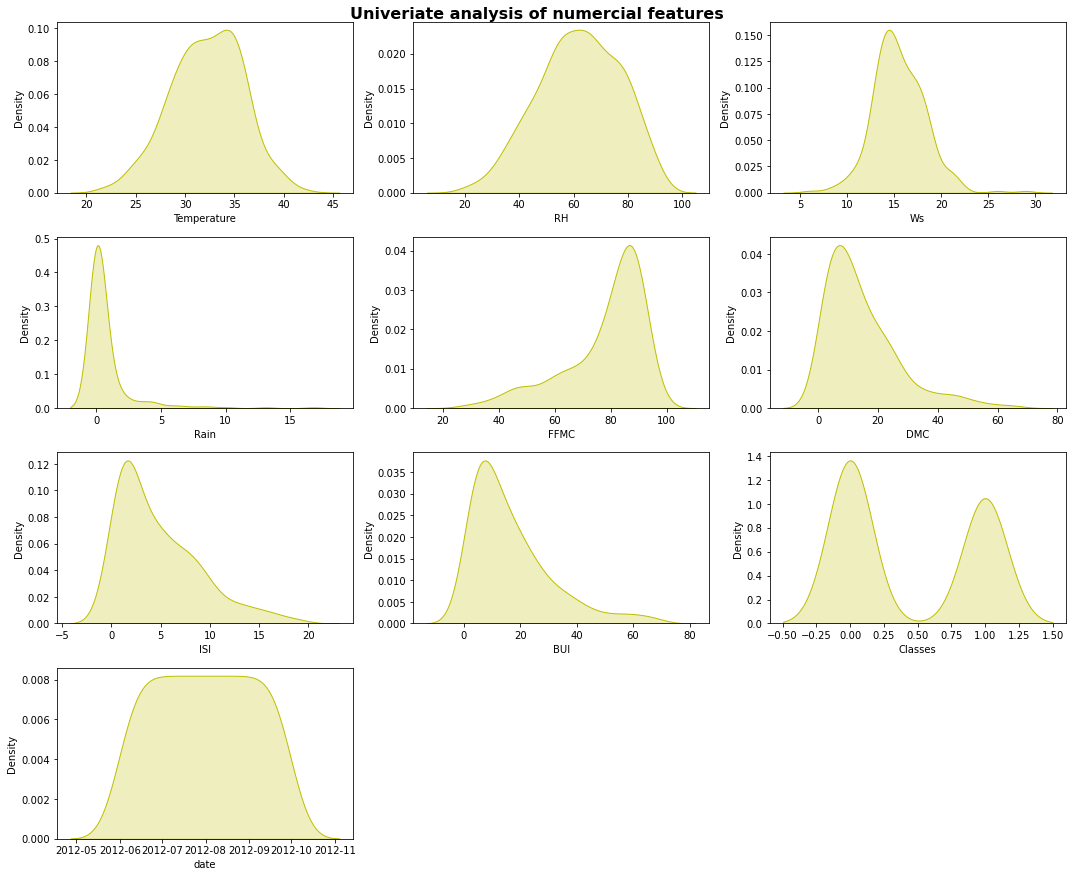

In [95]:
plt.figure(figsize=(15, 15))
plt.suptitle("Univeriate analysis of numercial features", fontsize = 16, fontweight = 600)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], shade = True, color='y')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

## Categorical Features

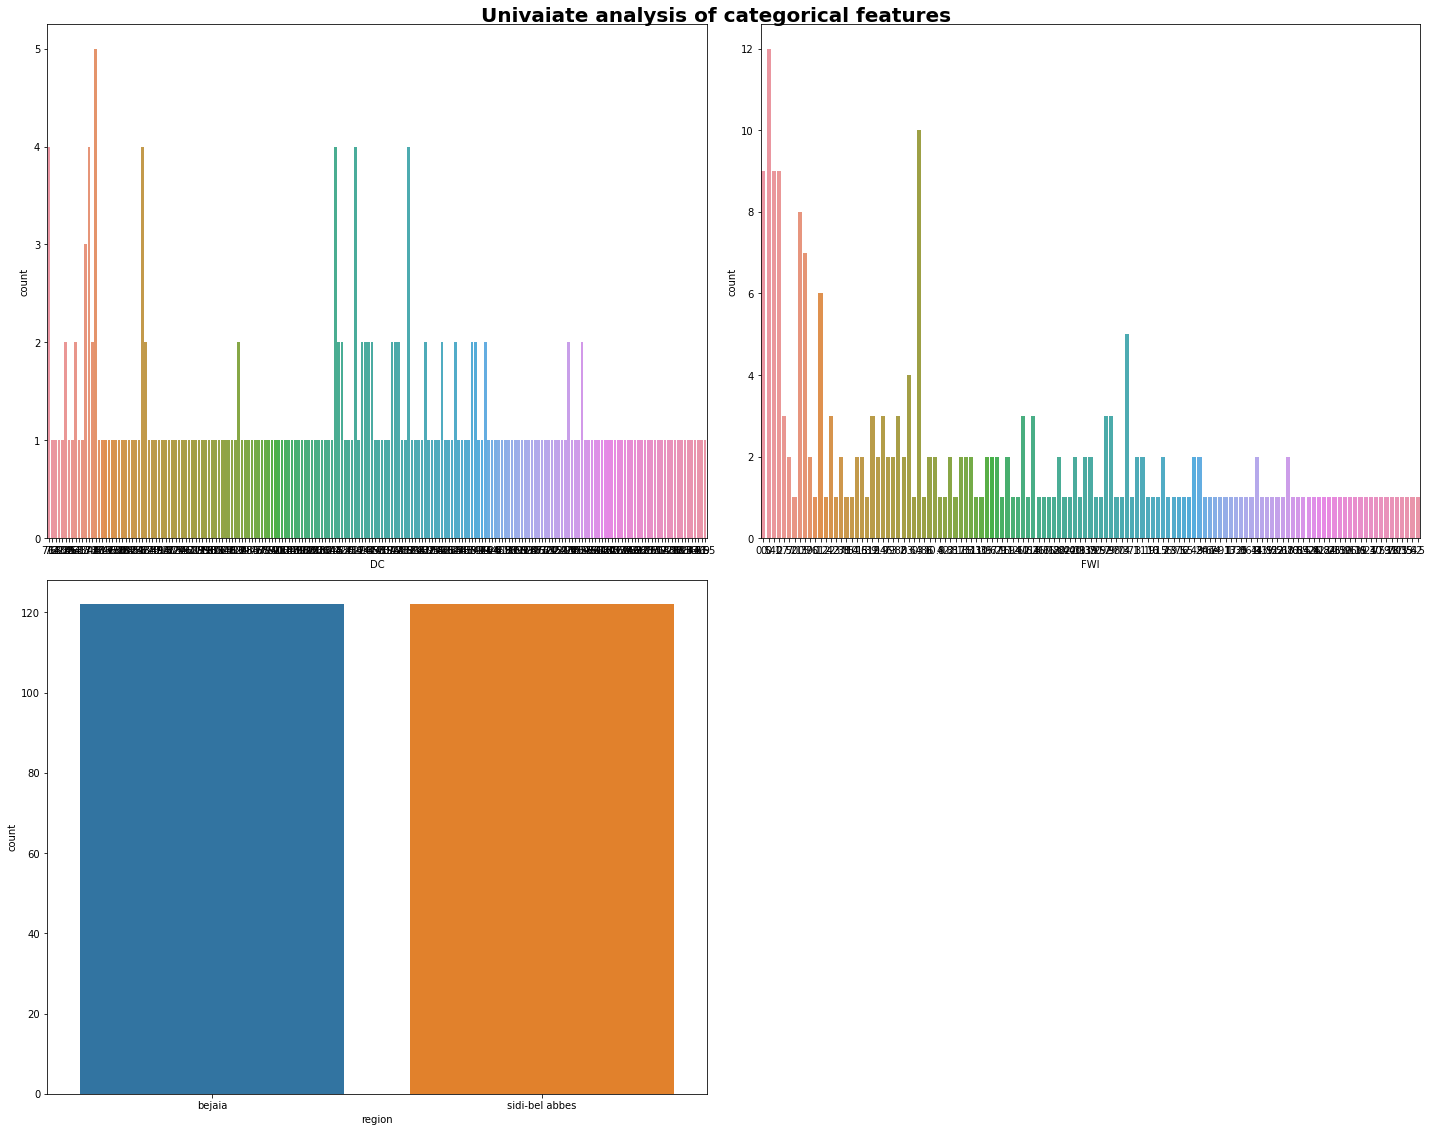

In [106]:
plt.figure(figsize=(20,16))
plt.suptitle("Univaiate analysis of categorical features", fontsize=20, fontweight=700)

cat = ['DC', 'FWI', 'region']
for i in range(0, len(cat)):
    plt.subplot(2,2, i+1)
    sns.countplot(x = df[cat[i]] , data=df)
    plt.xlabel(cat[i])
    plt.tight_layout()


In [107]:
#here we can analys which area has most of the time fire happen

<AxesSubplot:xlabel='region', ylabel='Classes'>

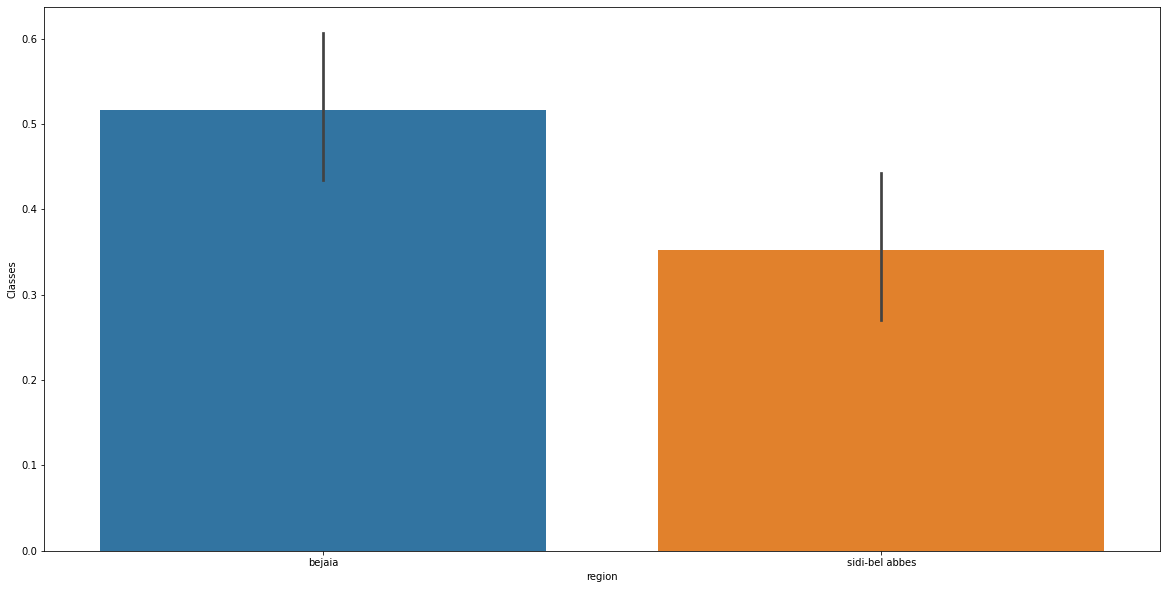

In [116]:
plt.figure(figsize=(20,10))
sns.barplot(x='region', y= 'Classes', data=df)

In [ ]:
Here by this graph plot it is very clear that region of bejaia have more fire caught.

In [118]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1.0,bejaia,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1.0,bejaia,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1.0,bejaia,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,1.0,bejaia,2012-06-04
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1.0,bejaia,2012-06-05


# Temperature range analysis

Text(0.5, 1.0, 'Distribution of temperature')

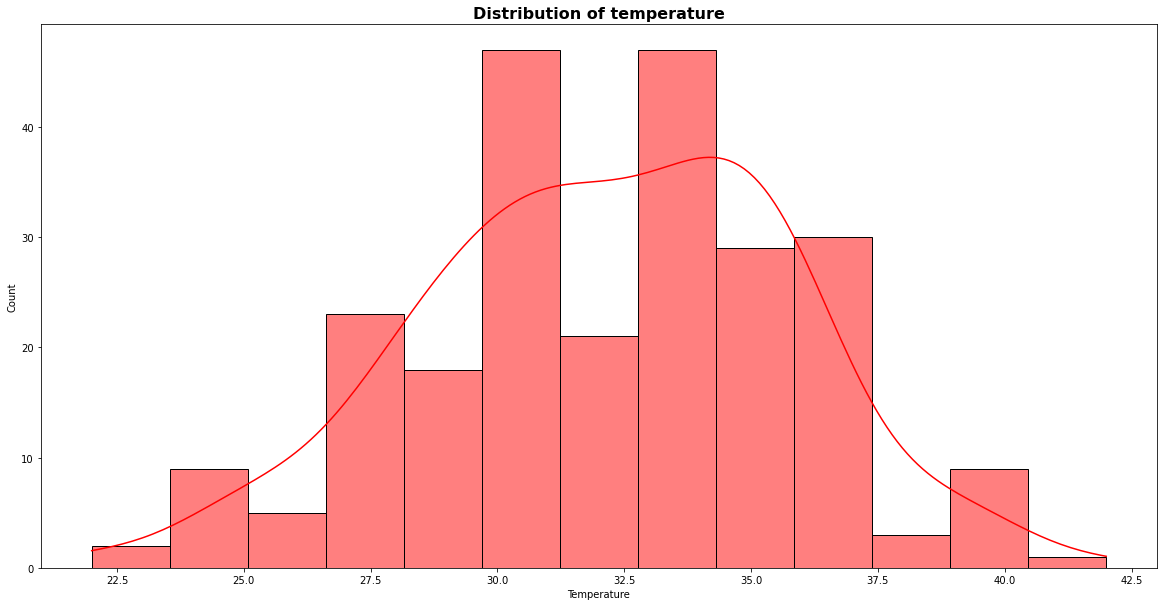

In [120]:
plt.subplots(figsize=(20,10))
sns.histplot("Distribution of temperature", x = df.Temperature, color='r', kde = True)
plt.title("Distribution of temperature", fontsize = 16, fontweight=700)


Observation :
    maximum temperature range from 32.5 to 35.0

# Heighest Temperature attained

<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

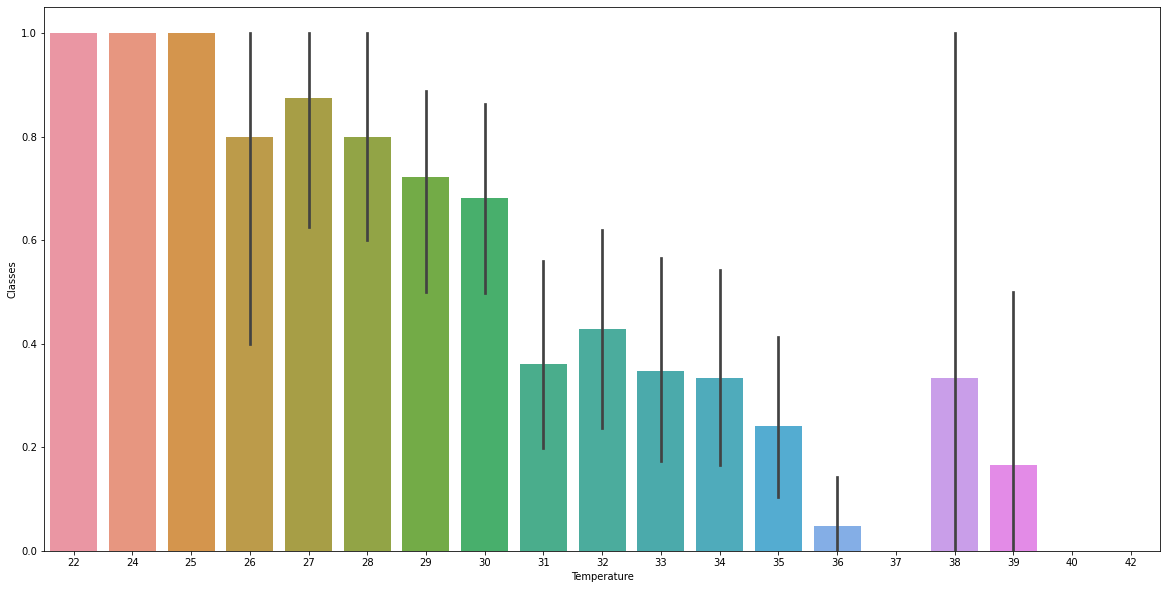

In [133]:
matplotlib.rcParams['figure.figsize']=(20,10)
sns.barplot(x = df.Temperature, y=df.Classes, data=df)

## Most rain happening in the region

<AxesSubplot:xlabel='region', ylabel='Rain'>

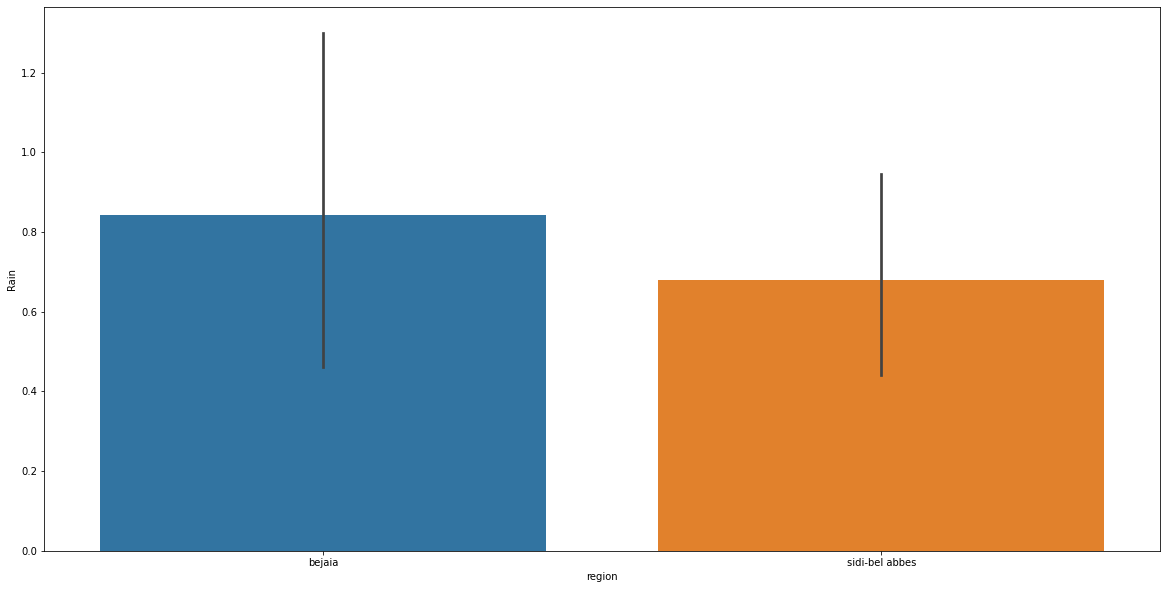

In [135]:
matplotlib.rcParams['figure.figsize']=(20,10)
sns.barplot(x="region", y="Rain", data=df)

Observation : Bejaia region have more rainfall

### Multivariate analysis : analysis with more than one variable 

Numerical Features

In [137]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.607551,0.455504,-0.518119
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.690637,-0.348587,0.435023
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.015248,0.029756,0.066529
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.347105,-0.299171,0.379449
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.739730,0.589652,-0.770114
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.674499,0.982073,-0.584188
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,1.000000,0.635891,-0.735511
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.635891,1.000000,-0.583882
Classes,-0.518119,0.435023,0.066529,0.379449,-0.770114,-0.584188,-0.735511,-0.583882,1.000000


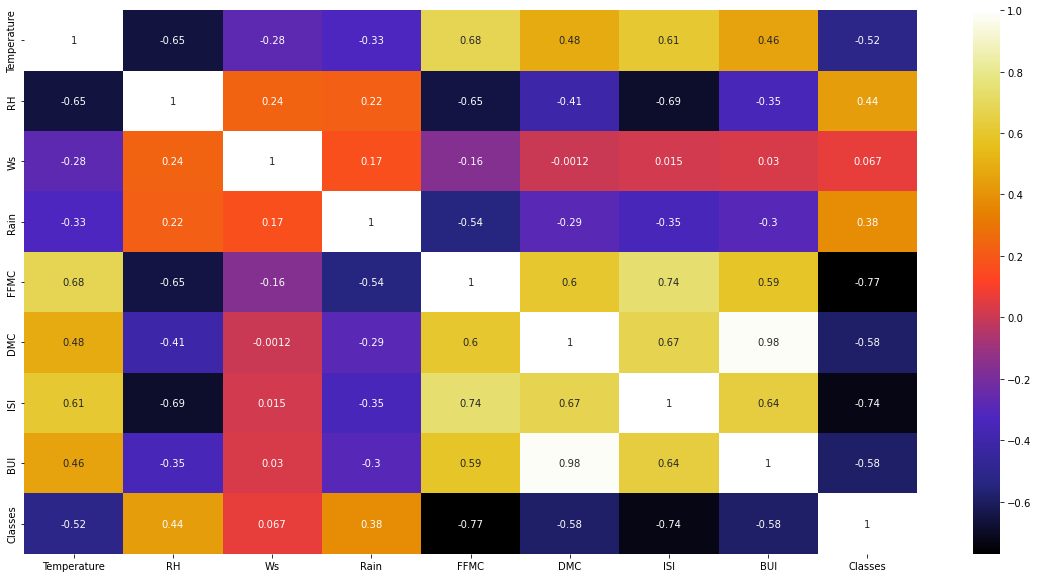

In [139]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='CMRmap', annot=True)
plt.show()

# Box plot to see outliers

<AxesSubplot:>

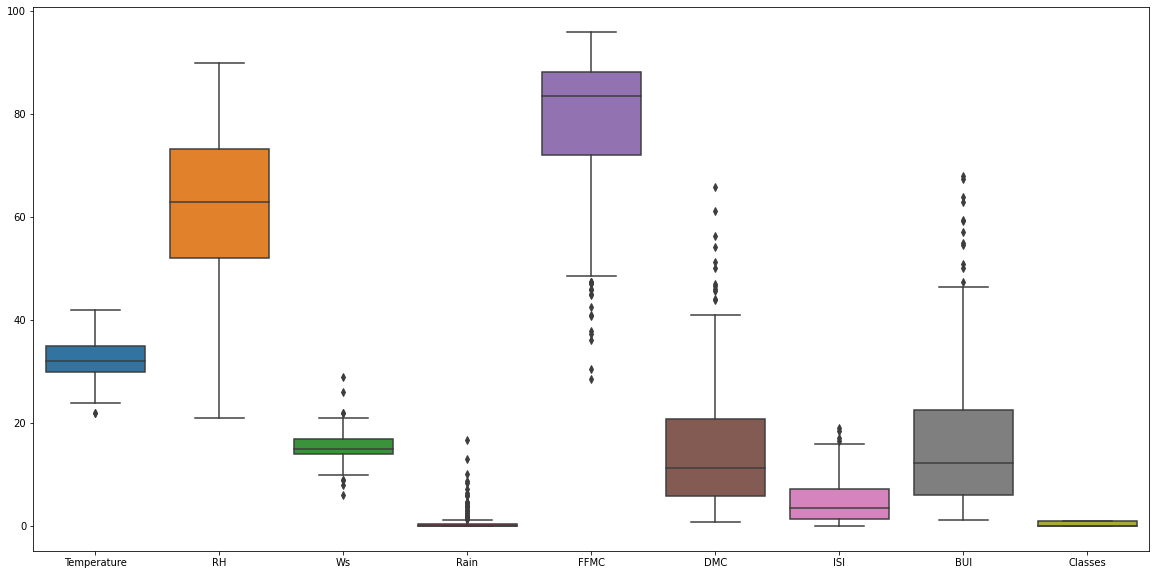

In [141]:
sns.boxplot(data=df, orient='v')

Boxplot of Classes vs Temperature

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

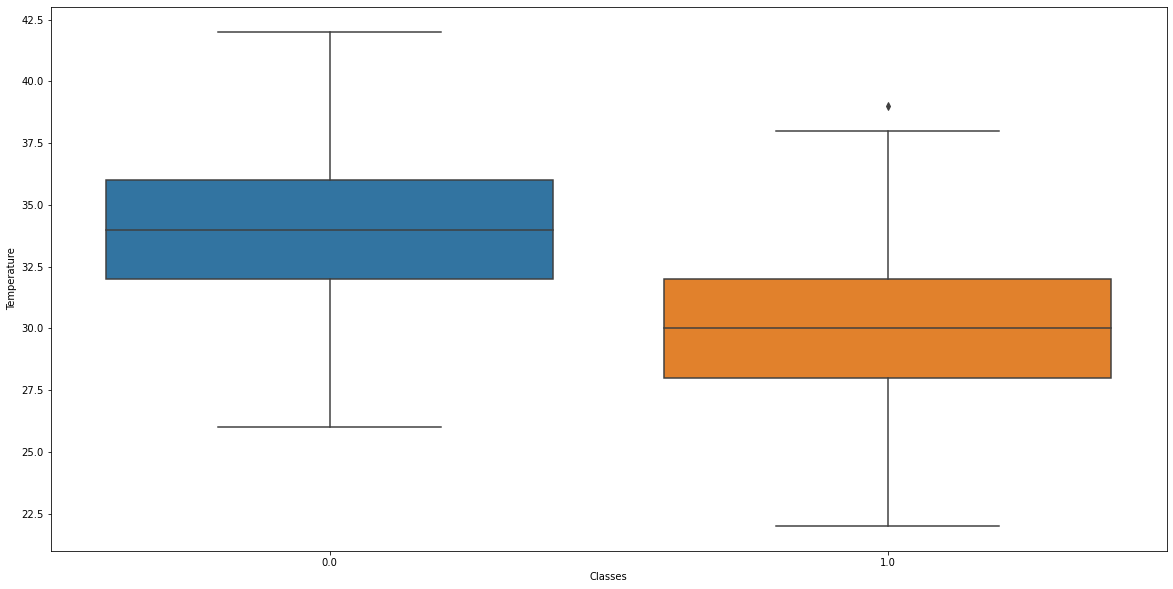

In [143]:
sns.boxplot(x = 'Classes', y="Temperature", data=df)

Observation: Fire happen even at low temperature once

### Boxplot vs rain vs Classes

<AxesSubplot:xlabel='Classes', ylabel='Rain'>

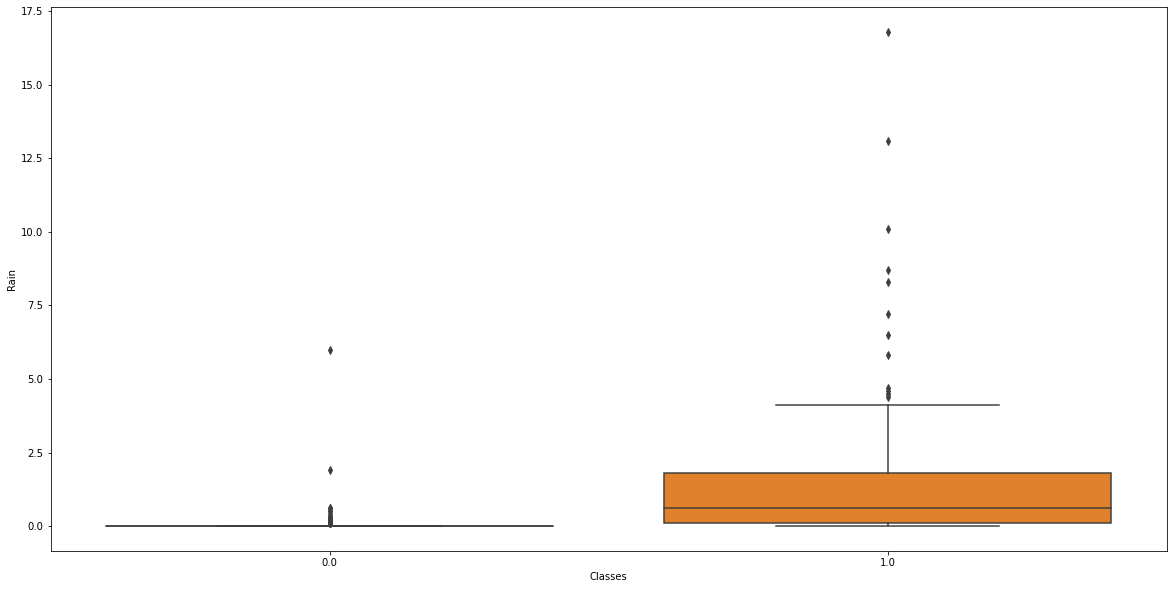

In [144]:
sns.boxplot(x = "Classes", y= "Rain", data=df)

Observation : Many days fire took place even in rain

### statical analysis

In [145]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754,0.434426
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824,0.496700
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000,0.000000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,1.000000
